

# **Trust Region Optimization on the Rosenbrock Function**
---
### **Group Members:**

*   Ch. Siddharth (BCD21)
*   K Sri Chaitan (BCD38)
*   K Karthik Raj (BCD41)



## **Documentation Summary:**



# **Rosenbrock Function**
The Rosenbrock function is a commonly used test function for optimization algorithms, defined as:
\[
f(x, y) = (1 - x)^2 + 100 \cdot (y - x^2)^2
\]
It has a global minimum at (1, 1), and the function's characteristic narrow, curved valley makes it difficult for optimization algorithms to converge. The code implements this function and its gradient, which helps to guide the optimization process.

## **Trust Region Optimization Algorithm**
Trust region optimization is an iterative method for constrained optimization problems. It bounds the step size by defining a "trust region" where the optimizer is confident that the model is accurate. If a step taken within the region significantly reduces the objective function, the region expands; otherwise, it contracts.

### **Key Functions:**

#### 1. `rosenbrock_function`
This function calculates the value of the Rosenbrock test function at a given point `(x, y)`.

#### 2. `rosenbrock_gradient`
This function computes the gradient (the partial derivatives) of the Rosenbrock function, which is needed to determine the direction of steepest descent for optimization algorithms.

#### 3. `rosenbrock_hessian`
This function calculates the Hessian matrix (second-order partial derivatives) of the Rosenbrock function. The Hessian provides insight into the curvature of the function, which helps in finding an optimal direction for the algorithm.

#### 4. `steihaug_cg`
This function implements the Steihaug conjugate gradient method, which solves the trust region subproblem. It iterates to find the optimal step within the defined trust region by adjusting the optimization direction.

#### 5. `trust_region_optimization`
This is the main optimization function that uses the trust region approach. It applies the gradient and Hessian to compute steps inside the trust region and adjusts the region size based on the success of each step.

## **Visualization:**
The optimization path and trust region sizes at each iteration are visualized over a contour plot of the Rosenbrock function. This helps to understand how the optimizer converges to the minimum.


## **Import Libraries:**

This cell imports three essential libraries for numerical computation, plotting, and creating graphical elements:

`numpy` (imported as `np`):

* Provides support for numerical operations on arrays and matrices.
* Offers functions for mathematical calculations, linear algebra, and random number generation.
* Fundamental library for scientific computing in Python.

`matplotlib.pyplot` (imported as `plt`):

* A collection of functions that make matplotlib work like MATLAB.
* Enables the creation of various types of plots and charts for data visualization.
* Provides tools for customizing plot appearance and exporting plots in different formats.

`matplotlib.patches.Circle:`

* Represents a circle shape that can be added to a plot.
* Used for graphical representation of circular objects or regions of interest.
* Allows customization of circle properties such as radius, color, and fill.

### **Purpose in Context:**

In the context of the provided code, which implements the Trust Region Optimization algorithm on the Rosenbrock function, these libraries play the following roles:

* `numpy` is used extensively for calculations involving arrays and matrices, such as evaluating the Rosenbrock function, its gradient, and Hessian.

* `matplotlib.pyplot` is used for creating the contour plot of the Rosenbrock function and visualizing the optimization path.

* `matplotlib.patches.Circle` is used to draw the trust region circles at each iteration of the optimization algorithm.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

## **Rosenbrock Function:**

A non-convex function often used as a performance test problem for optimization algorithms. It has a global minimum at (1, 1) but is characterized by a narrow, curved valley, making it challenging to find the minimum.

###**Formula:**

The Rosenbrock function is defined as:

f(x, y) = (1 - x)^2 + 100 * (y - x^2)^2


**Purpose:**

* The primary purpose of this function is to provide a way to evaluate the Rosenbrock function at any given point (x, y). This is essential for optimization algorithms that need to repeatedly calculate the function's value to search for the minimum.

**How it Works:**

* Input: The function takes a single argument point, which is expected to be an array-like object containing two elements representing the x and y coordinates of the point.

* Calculation: It unpacks the point into x and y variables.

* Evaluation: It applies the Rosenbrock function formula using the x and y values.

* Output: It returns the calculated function value as a float.

In [ ]:
# Rosenbrock Function
def rosenbrock_function(point):
    x, y = point
    return (1 - x)**2 + 100 * (y - x**2)**2

## **Rosenbrock Gradient:**


This cell defines a function called `rosenbrock_gradient` that calculates the gradient of the Rosenbrock function at a given point.


* **Gradient:** The gradient of a function is a vector that points in the direction of the greatest rate of increase of the function. It is calculated by taking the partial derivatives of the function with respect to each of its variables.


* **Rosenbrock Gradient:**
The gradient of the Rosenbrock function is given by:


*   `df/dx = -2 * (1 - x) - 400 * x * (y - x^2)`
*   `df/dy = 200 * (y - x^2)`



### **Purpose:**

The main purpose of this function is to provide a way to compute the gradient of the Rosenbrock function at any given point (x, y). The gradient is crucial for optimization algorithms, as it indicates the direction of steepest ascent. Optimization algorithms use the gradient to determine the search direction for finding the minimum of the function.

### **How it Works:**

* **Input:** The function takes a single argument point, which represents the point (x, y) where the gradient needs to be evaluated.
* **Calculation:** It unpacks the point into x and y variables.
* **Partial Derivatives:** It calculates the partial derivatives of the Rosenbrock function with respect to x (df/dx) and y (df/dy) using the formulas mentioned earlier.
* **Output:** It returns a NumPy array containing the calculated partial derivatives, representing the gradient vector at the given point.

In [ ]:
# Rosenbrock Gradient
def rosenbrock_gradient(point):
    x, y = point
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

##**Rosenbrock Hessian:**

This cell defines a function called rosenbrock_hessian that calculates the Hessian matrix of the Rosenbrock function at a given point.

* **Hessian Matrix:** The Hessian matrix of a function is a square matrix of second-order partial derivatives. It provides information about the curvature of the function at a specific point.
* **Rosenbrock Hessian:** The Hessian matrix of the Rosenbrock function is given by:

```
[[2 - 400y + 1200x^2, -400x],
   [-400x,            200]]
```
### **Purpose:**

The primary purpose of this function is to compute the Hessian matrix of the Rosenbrock function at a given point (x, y). The Hessian matrix is essential for optimization algorithms that utilize second-order information about the function, such as Trust Region methods. It helps in determining the search direction and step size more accurately.

### **How it Works:**

* **Input:** The function takes a single argument point, which represents the point (x, y) where the Hessian needs to be evaluated.
* **Unpacking:** It unpacks the point into x and y variables.
* **Second-Order Derivatives:** It calculates the second-order partial derivatives of the Rosenbrock function (h_xx, h_xy, and h_yy) using the formulas derived from the Rosenbrock function.
* **Hessian Matrix:** It constructs the Hessian matrix using the calculated second-order derivatives, forming a 2x2 NumPy array.
* **Output:** It returns the NumPy array representing the Hessian matrix at the given point.


In [ ]:
# Rosenbrock Hessian
def rosenbrock_hessian(point):
    x, y = point
    h_xx = 2 - 400 * y + 1200 * x**2
    h_xy = -400 * x
    h_yy = 200
    return np.array([[h_xx, h_xy], [h_xy, h_yy]])

## **Conjugate Gradiant Method**

This cell implements the Steihaug Conjugate Gradient (CG) method to solve the trust region subproblem. The trust region subproblem is a crucial step in trust region optimization algorithms, where we aim to find the optimal step within a defined trust region.

* **Steihaug CG:** A variant of the conjugate gradient method specifically adapted for solving the trust region subproblem. It efficiently finds an approximate solution within the trust region by considering the curvature information provided by the Hessian matrix.


### **Purpose:**

The primary purpose of this function is to determine the optimal step direction and size within the trust region during the trust region optimization process. It aims to find a step that minimizes the objective function while staying within the defined trust region.

### **How it Works:**
* **Initialization:** Initializes variables like the step direction (`p`), residual (`r`), conjugate direction (`d`), and residual norm squared (`r_norm_sq`).
* **Iteration:** Iteratively updates the step direction and other variables using the conjugate gradient method.
* **Trust Region Constraints:** Checks if the step goes outside the trust region. If it does, it calculates a step size (`tau`) to bring the step back within the trust region boundary.
* **Convergence Check:** Checks if the residual norm is below a tolerance (`tol`). If so, it considers the solution converged and returns the current step direction (`p`).
* **Maximum Iterations:** If the maximum number of iterations (`max_iter`) is reached without convergence, it returns the current step direction (`p`).


### **Arguments:**

`g:` The gradient of the objective function at the current point.

`H:` The Hessian matrix of the objective function at the current point.

`radius:` The radius of the trust region.

`max_iter:` The maximum number of iterations allowed (defaults to 1000).

`tol:` The tolerance for convergence (defaults to 1e-8).

In [ ]:
# Conjugate Gradient Method for Trust Region Subproblem
def steihaug_cg(g, H, radius, max_iter=1000, tol=1e-8):
    n = len(g)
    p = np.zeros(n)
    r = g.copy()
    d = -r.copy()

    r_norm_sq = r.dot(r)

    for _ in range(max_iter):
        if r_norm_sq < tol:
            return p

        Hd = H.dot(d)
        dHd = d.dot(Hd)

        if dHd <= 0:
            a = p.dot(p)
            b = 2 * p.dot(d)
            c = d.dot(d)
            tau = (-b + np.sqrt(b**2 - 4*a*(c - radius**2))) / (2*c)
            return p + tau * d

        alpha = r_norm_sq / dHd
        p_next = p + alpha * d

        if np.linalg.norm(p_next) >= radius:
            a = d.dot(d)
            b = 2 * p.dot(d)
            c = p.dot(p) - radius**2
            tau = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
            return p + tau * d

        r_next = r + alpha * Hd
        r_next_norm_sq = r_next.dot(r_next)
        beta = r_next_norm_sq / r_norm_sq

        p = p_next
        r = r_next
        r_norm_sq = r_next_norm_sq
        d = -r + beta * d

    return p

## **Trust Region Optimization Algorithm:**


This cell implements the Trust Region Optimization algorithm, a powerful iterative method for finding the minimum of a function. The algorithm works by defining a "trust region" around the current point and approximating the function within this region using a quadratic model. It then finds the minimum of this model within the trust region and updates the current point accordingly. The size of the trust region is adjusted based on the accuracy of the model's prediction.

### **Purpose:**
The main purpose of this function is to minimize a given objective function using the Trust Region Optimization algorithm. It iteratively searches for the minimum by taking steps within a trust region, adjusting the region's size based on the progress made.

## **How it Works:**

* **Initialization:** Sets the initial point (`x0`), trust region radius (`initial_radius`), and stores the initial point and radius in the positions and radii lists.
* **Iteration:** Iterates until the maximum number of iterations (`max_iter`) is reached or the gradient norm is below a tolerance (`epsilon`).
* **Gradient and Hessian:** Calculates the gradient (`g`) and Hessian (H) of the objective function at the current point.
Step Calculation: Calls the steihaug_cg function to find the optimal step (`p`) within the trust region.
* **Reduction Evaluation:** Computes the actual reduction in the objective function (`actual_reduction`) and the predicted reduction based on the quadratic model (`predicted_reduction`).
* **Trust Region Update:** Adjusts the trust region radius (`radius`) based on the ratio of actual to predicted reduction (`ratio`). If the model predicts the reduction well, the radius is increased; otherwise, it is decreased.
* **Point Update**: If the step is accepted (based on `ratio` and `eta`), updates the current point (`x`) by adding the step (`p`).

In [ ]:
# Trust Region Optimization Algorithm
def trust_region_optimization(f, grad, hess, x0, initial_radius=1.0, max_radius=10.0,
                            eta=0.1, epsilon=1e-6, max_iter=1000):
    x = x0
    radius = initial_radius
    positions = [x.copy()]
    radii = [radius]

    for i in range(max_iter):
        g = grad(x)
        H = hess(x)

        if np.linalg.norm(g) < epsilon:
            break

        p = steihaug_cg(g, H, radius)

        actual_reduction = f(x) - f(x + p)
        predicted_reduction = -(g.dot(p) + 0.5 * p.dot(H.dot(p)))

        if predicted_reduction == 0:
            ratio = 1.0 if actual_reduction == 0 else 0.0
        else:
            ratio = actual_reduction / predicted_reduction

        if ratio < 0.25:
            radius = 0.25 * radius
        elif ratio > 0.75 and np.linalg.norm(p) >= 0.99 * radius:
            radius = min(2.0 * radius, max_radius)

        if ratio > eta:
            x = x + p
            positions.append(x.copy())
            radii.append(radius)
            #print(f'Iteration {i+1}: x = {x[0]:.6f}, y = {x[1]:.6f}, f(x,y) = {f(x):.6f}, radius = {radius:.6f}')

    return np.array(positions), np.array(radii)

## **Visualization:**

This cell visualizes the Trust Region Optimization process on the Rosenbrock function. It creates a contour plot of the Rosenbrock function and overlays the optimization path, trust regions, starting point, and converged point.

### **Purpose:**

The primary purpose of this code is to provide a visual representation of how the Trust Region Optimization algorithm navigates the search space to find the minimum of the Rosenbrock function. It helps in understanding the algorithm's behavior and the evolution of the trust region.

### **How it Works:**

1. **Data Preparation:**

* Creates a grid of points (`X, Y`) using np.`linspace` and `np.meshgrid` to represent the search space.
* Calculates the Rosenbrock function values (`Z`) at each grid point using np.vectorize.
* Sets the initial point (`initial_point`) for the optimization.
* Runs the `trust_region_optimization` function to get the optimization path (`positions`) and trust region radii (`radii`).

2. **Visualization:**
* Creates a figure and axes (`fig, ax`) using `plt.subplots.`
* Plots the contour lines of the Rosenbrock function using `ax.contour.`
* Adds a colorbar to represent the function values.
* Plots the optimization path as a red line with markers using `ax.plot`.
* Draws trust region circles at each step using `ax.add_patch` and `Circle.`
* Marks the starting point in green and the converged point in blue using `ax.scatter.`
* Sets labels for the axes, title, grid, and legend.
* Displays the plot using `plt.show().`

### **Visualization Elements:**
* Contour Plot: Represents the Rosenbrock function's landscape with contour lines indicating regions of equal function values.
* Optimization Path: Shows the sequence of points visited by the algorithm during the optimization process.
* Trust Regions: Circular regions centered at each step, representing the area where the algorithm trusts its quadratic model.
* Starting Point: The initial point from where the optimization begins.
* Converged Point: The final point reached by the algorithm, representing the approximate minimum of the function.

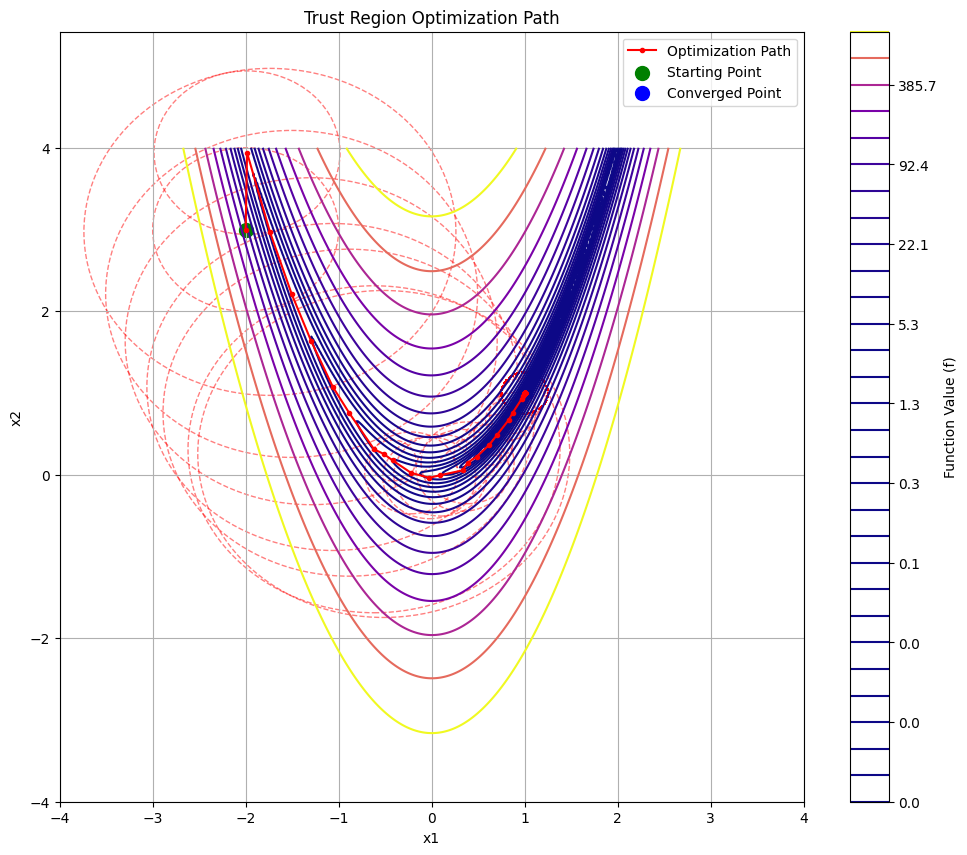

In [ ]:
# Set up the visualization
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = np.vectorize(lambda x, y: rosenbrock_function([x, y]))(X, Y)

# Run Trust Region optimization
initial_point = np.array([-2.0, 3.0])
positions, radii = trust_region_optimization(rosenbrock_function, rosenbrock_gradient,
                                          rosenbrock_hessian, initial_point)

# Plot the graph
fig, ax = plt.subplots(figsize=(12, 10))

# Plot contour
contour = ax.contour(X, Y, Z, levels=np.logspace(-3, 3, 30), cmap='plasma')
plt.colorbar(contour, label="Function Value (f)")

# Plot the optimization path
ax.plot(positions[:, 0], positions[:, 1], 'ro-', label="Optimization Path", linewidth=1.5, markersize=3)

# Plot the trust region circles at each step
for i in range(len(positions)):
    ax.add_patch(Circle((positions[i, 0], positions[i, 1]), radii[i], fill=False, color='red', linestyle='--', alpha=0.5))

# Plot start and end points
ax.scatter(positions[0, 0], positions[0, 1], color='green', s=100, label="Starting Point")
ax.scatter(positions[-1, 0], positions[-1, 1], color='blue', s=100, label="Converged Point")

# Labeling and styling the plot
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Trust Region Optimization Path")
ax.grid(True)
ax.legend()

# Show the plot
plt.show()

### Done by:
### Siddhart Chitikesi (BCD21)